In [1]:
from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

#from src.Target import Target

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
#from src.callbacks import *
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# pre-processing

In [3]:
#folder deberia ser definida aqui arriba
folder = 'prueba/'

In [4]:
list_paddings = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 'rdm_padding']

In [5]:
#loading data
file_in= "".join(['/home/angela/padding_uniprot/', 'raw_data/uniprot-reviewed_yes+AND+taxonomy_archaea-EC.tab.gz'])
df_ori = loading_data(file_in, 'EC number')

#creating dataset for the test
df = pd.DataFrame(columns=['Entry', 'Sequence', 'EC number'])
for i in ['nan', '1.', '2.', '3.', '4.', '5.', '6.', '7.']:
    df_u = df_ori[df_ori['EC number'].str.startswith(i)][:20]
    df = pd.concat([df, df_u])

In [6]:
df.sample(frac=1).reset_index().drop('index', axis=1)

,Entry,Sequence,EC number
0,Q8TPF4,MMIAGIDEAGKGPVIGPMCIGGVKIEESRAHILKVLGVADSKKLTP...,3.1.26.4
1,O50083,MNVEEMKKIAAKEALKFIEDDMVIGLGTGSTTAYFIKLLGEKLKRG...,5.3.1.6
2,Q9Y8T0,MPSPPEPPLHWRDCRLEPILGFPRPRELAKSLEVQGEEWIALLESG...,4.1.3.27
3,A3CVJ3,MGSQWTKDSVYRKAMKAGYRARAAYKLLEIQQRNGIIRPDDNVVDL...,2.1.1.166
4,Q6L1E2,MNRKDKYYIRAKRENYRSRASYKIIEINNKYNIVSRGDNVLEFGSS...,2.1.1.166
5,O05207,MSAKEKFTSLSPAEFFKRNPELAGFPNPARALYQTVRELIENSLDA...,5.6.2.3
6,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
7,C3MYZ9,MSIDQRLQLITRNAAEIITIDELRKKLESEEKLKGYIGFEPSGLFH...,6.1.1.1
8,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
9,Q58424,MVKILVTDPLHEDAIKILEEVGEVEVATGLTKEELLEKIKDADVLV...,1.1.1.95


(1248, 592)


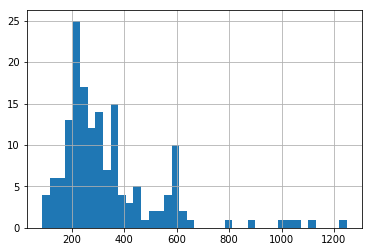

In [7]:
#max len
max_len = looking_max_len(df)
print(max_len)

In [8]:
max_lenn = max_len[1]
df_filt = filtering_over_maxlen(df, max_lenn)

In [9]:
df_filt

,Entry,Sequence,EC number
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan


In [10]:
dicti = creating_dict()

In [11]:
dicti

{'0': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [12]:
dicti_padding = {}
for i in list_paddings:
    dicti_padding[i] = processing_sequences(df_filt, i, max_lenn)

0      MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...
1      MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...
2      MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...
3      MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...
4      MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...
5      MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...
6      MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...
7      MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...
8      MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...
9      MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
10     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
11     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
12     MKANVYSMEGEVKEEIELPAIFNEEYRPDLIKRAVISAQTARVQPW...
13     MKVKVFNLEGEPVEEIELPKVFSTPFRPDLIRRAVIASWTHRIQPQ...
14     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
15     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
16     MQAVEMEKKAGNENPMREVVLDKVVINIGVGESGERHKKAYSLLEE...
17     MPAIDLSTIDLRAIKPSDLDWRKF

0      M000K000T000P000P000V000L000K000R000R000R000E0...
1      M000D000L000E000Y000Q000K0000K000L0000A000A000...
2      M00S00K00L00L00T00E00S00D00S00L00K00V00I00R00R...
3      M00A00F00D00R00Q00K00L00V00E00A00V00K00E00A00K...
4      M00V00S00V00D00Q00V00K00K00A00R00E00G00K00K00R...
5      M00000V00000Q00000K00000P00000H00000S00000F000...
6      M00000V00000K00000R00000T00000H00000G00000Y000...
7      M000000D000000P000000Y000000K000000V000000I000...
8      M000000P000000N000000P000000H000000Y000000R000...
9      M0N0V0K0V0Y0N0L0D0G0S0E0K0G0D0I0E0L0P0A0V0F0E0...
10     M0N0V0K0V0Y0N0L0D0G0S0E0K0G0D0I0E0L0P0A0V0F0E0...
11     M0N0V0K0V0Y0N0L0D0G0S0E0K0G0D0I0E0L0P0A0V0F0E0...
12     M0K0A0N0V0Y0S0M0E0G0E0V0K0E0E0I0E0L0P0A0I0F0N0...
13     M0K0V0K0V0F0N0L0E0G0E0P0V0E0E0I0E0L0P0K0V0F0S0...
14     M0Y0L0E0L0V0K0K0N0S0V0I0L0D0K0D0G0N0K0V0K0E0V0...
15     M0Y0L0E0L0V0K0K0N0S0V0I0L0D0K0D0G0N0K0V0K0E0V0...
16     M00Q00A00V00E00M00E00K00K00A00G00N00E00N00P00M...
17     M00P00A00I00D00L00S00T00

In [13]:
dicti_padding['ext_padding']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [14]:
# creating binary enzyme/no enzyme label
df_bin = binarizing_EC(df_filt)

1.0    122
0.0     20
Name: enzyme, dtype: int64


In [15]:
df_bin

,Entry,Sequence,EC number,target,enzyme
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7fcc2cd3fd68>,0.0
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7fcc2d4421d0>,0.0
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7fcc2cd45518>,0.0
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7fcc2cd455c0>,0.0
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7fcc2cd0de10>,0.0
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7fcc2cd0d128>,0.0
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7fcc2cd0d358>,0.0
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7fcc2cd0de48>,0.0
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7fcc2cd0d400>,0.0
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7fcc2cd0d160>,0.0


In [16]:
df_digit1 = first_digit_EC(df_bin)

In [17]:
df_digit1

,Entry,Sequence,EC number,target,enzyme,digit1
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7fcc2cd3fd68>,0.0,[nan]
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7fcc2d4421d0>,0.0,[nan]
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7fcc2cd45518>,0.0,[nan]
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7fcc2cd455c0>,0.0,[nan]
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7fcc2cd0de10>,0.0,[nan]
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7fcc2cd0d128>,0.0,[nan]
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7fcc2cd0d358>,0.0,[nan]
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7fcc2cd0de48>,0.0,[nan]
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7fcc2cd0d400>,0.0,[nan]
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7fcc2cd0d160>,0.0,[nan]


In [18]:
labels_task1 = bin_to_onehot(df_digit1, 2)

In [19]:
labels_task1

[array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0.

There are  0 samples with more than one label
The unique labels are  ['nan', '1', '2', '3', '4', '5', '6', '7']


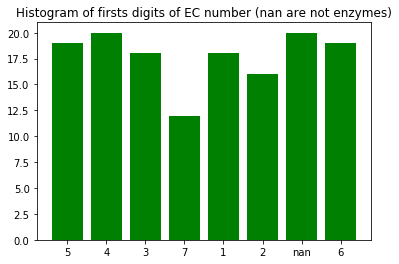

In [20]:
counting_multilabel(df_digit1)

In [21]:
ec_multilabel = encoding_as_multilabel(df_digit1, 'prueba/')

(7,)
Shape of the resulting encoding (142, 7)


In [22]:
ec_multilabel

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [23]:
data_to_hdf5('prueba/', 'data.h5', list_paddings, dicti_padding, labels_task1, ec_multilabel)

In [24]:
splitting_sets = splitting_sets(0.8, 0.5, dicti_padding['post_padding'], ec_multilabel, 'prueba/', kfold_bool=True, n_splits=3)

In [25]:
len(dicti_padding['post_padding'])

142

In [26]:
ec_multilabel.shape

(142, 7)

In [27]:
creating_augmented_data(dicti_padding, labels_task1, splitting_sets, 'prueba/', 'aug_data.h5', 
                            labels_task2 = ec_multilabel, kfold_bool = True)

In [28]:
# keeping indices total data
keeping_indices_enzymes(labels_task1, splitting_sets, 'prueba/', 'idcs_data_enz.h5', True)

In [29]:
#keeping indices aug data
file_data = os.path.join(absPath, 'data/prueba/', 'aug_data.h5')
h5f = h5py.File(file_data, 'r')
task1_aug = h5f['labels_task1'][:len(h5f['labels_task1'])]


# Loading splitting indices
file_idcs = os.path.join(absPath, 'data/prueba/', 'idcs_aug_split.pickle')

with open(file_idcs, "rb") as input_file:
    k_aug_indices = pickle.load(input_file)

keeping_indices_enzymes(labels_task1, splitting_sets, 'prueba/', 'idcs_aug_enz.h5', True)


In [30]:
# defining deep learning model
n_class = 2 #number of classes to output
drop_per = 0.2 #Input dropout 
n_neur = [314,77,8]
drop_hid = 0.5
dict_size = len(dicti)

batch_size = 6
epochss = 20

In [31]:
model = building_3dense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 'softmax', 'prueba/')
#model = building_1convdense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, 6,'softmax', 'prueba/')
#model = building_stackconv_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, [1,3,5,9,15], 10, 'softmax', 'prueba/')

W0710 16:39:43.169309 140516373083904 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 16:39:43.183376 140516373083904 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 16:39:43.185801 140516373083904 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0710 16:39:43.192522 140516373083904 deprecation.py:506] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is depre

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 592, 26)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 592, 26)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15392)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 314)               4833402   
_________________________________________________________________
dropout_2 (Dropout)          (None, 314)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 77)                24255     
_________________________________________________________________
dropout_3 (Dropout)          (None, 77)                0         
__________

In [32]:
model_number_layers(model)

0 input_1
1 dropout_1
2 flatten_1
3 dense_1
4 dropout_2
5 dense_2
6 dropout_3
7 dense_3
8 dropout_4
9 dense_4


In [33]:
saving_initial_weights(model, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], [3,5,7,9], 'prueba/', 'post_padding')

In [34]:
saving_initial_biases(model, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], [3,5,7,9], 'prueba/', 'post_padding')

In [35]:
generators = trainval_generators(splitting_sets, 'post_padding', 'prueba/', batch_size, 'labels_task1', True)

In [36]:
model_type= "post_padding"

In [37]:
adamm = Adam()
model.compile(loss='categorical_crossentropy', optimizer = adamm, metrics=['accuracy'])

W0710 16:39:43.525268 140516373083904 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [38]:
#Esto deberia ser una funcion "train_model" o algo asi
model_type = "post_padding"

for idx,i in enumerate(generators):
    i_train, i_val, i_test = splitting_sets[idx]
    len_train, len_val, len_test = len(i_train), len(i_val), len(i_test)
    train_generator, val_generator = i
    folder_cp = ''.join(string for string in [folder, model_type, '/', str(idx)]) 
    #print(folder_cp)
    if not os.path.exists(os.path.join(absPath, 'data/checkpoint/', folder_cp)):
        os.makedirs(''.join(string for string in [absPath, 'data/checkpoint/', folder_cp]))
    #if idx==0:
    #    callbacks_list = calling_callbacks(folder_cp, folder, 'post_padding', None, None, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], 
    #                               [3,5,7,9], False, False, True, False)
    #else:
    callbacks_list = calling_callbacks(folder_cp, folder, 'post_padding', None, None, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], 
                                   [3,5,7,9], False, False, False, False)
    start = time.time()
    history = model.fit_generator(generator=train_generator, 
                              validation_data=val_generator,
                             steps_per_epoch= int(len_train/batch_size),
                              validation_steps=int(len_val/batch_size),
                             epochs=epochss,
                             callbacks=callbacks_list,
                             verbose=1)
    end = time. time()
    count_time(start, end, folder, model_type)
    saving_results('post_padding', folder, idx, True)

prueba/post_padding/0


W0710 16:39:43.630924 140516373083904 deprecation.py:323] From /home/angela/.local/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
18/18 [==============================] - 1s 56ms/step - loss: 1.7910 - acc: 0.4630 - val_loss: 0.7021 - val_acc: 0.2500

Epoch 00001: val_acc improved from -inf to 0.25000, saving model to /home/angela/padding_EBI/data/checkpoint/prueba/post_padding/0/weights-improvement-001-0.2500.hdf5
Epoch 2/20
18/18 [==============================] - 1s 36ms/step - loss: 0.5672 - acc: 0.7778 - val_loss: 1.8032 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.25000
Epoch 3/20
18/18 [==============================] - 1s 36ms/step - loss: 0.8094 - acc: 0.7870 - val_loss: 2.1607 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.25000
Epoch 4/20
18/18 [==============================] - 1s 35ms/step - loss: 0.7569 - acc: 0.8056 - val_loss: 0.7292 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.25000
Epoch 5/20
18/18 [==============================] - 1s 36ms/step - loss: 0.4941 - acc: 0.8056 - val_loss: 0.8507 - val_acc: 0.0000e+00

Epoch 0

NameError: name 'history' is not defined

In [ ]:
idx_enz = [idx for idx,x in enumerate(list(list(np.array(df_digit1['enzyme'])).argmax(-1))) if x==1.0]


In [ ]:
list(np.array(df_digit1['enzyme']))

In [ ]:
len(dicti_padding)

In [ ]:
isinstance(ec_multilabel, np.ndarray)

In [ ]:
types_padding = [pre, post, mid, rdm]
post = ['aa0', 'bb0', 'cc0', 'dd0', 'ee0']
pre = ['0aa', '0bb', '0cc', '0dd', '0ee']
mid = ['a0a', 'b0b', 'c0c', 'd0d', 'e0e']
rdm = ['aai', 'bib', 'cci', 'idd', 'eie']
labels = [0,1,0,1,0]
labels_2 = [1,2,3,4,5]
i_train = [0,2,4]
i_test = [1,3]

In [ ]:
aug, task1, task2 = [], [], []
for i in range(len(post)):
    for j in types_padding:
        aug.append(j[i]), task1.append(labels[i]), task2.append(labels_2[i])
    #aug.append(post[i]), aug.append(pre[i])

In [ ]:
aug

In [ ]:
task1

In [ ]:
task2

In [ ]:
prueba_i = [list(range(x*len(types_padding),(x*len(types_padding)+len(types_padding)))) for idx,x in enumerate(i_train)]
prueba_i

In [ ]:
from itertools import chain 
new_i_train = list(chain(*prueba_i))
print(new_i_train)
shuffled = random.shuffle(new_i_train)
print(new_i_train)

In [ ]:
[aug[i] for i in new_i_train]

In [ ]:
[task1[i] for i in new_i_train]

In [ ]:
[task2[i] for i in new_i_train]

In [ ]:
#probamos a shuffle
index_shuf = random.shuffle(new_i_train)
index_shuf

In [ ]:
new_i_train